# Time Series Forecasting Traditional Market ETFs and Crypto ETFs

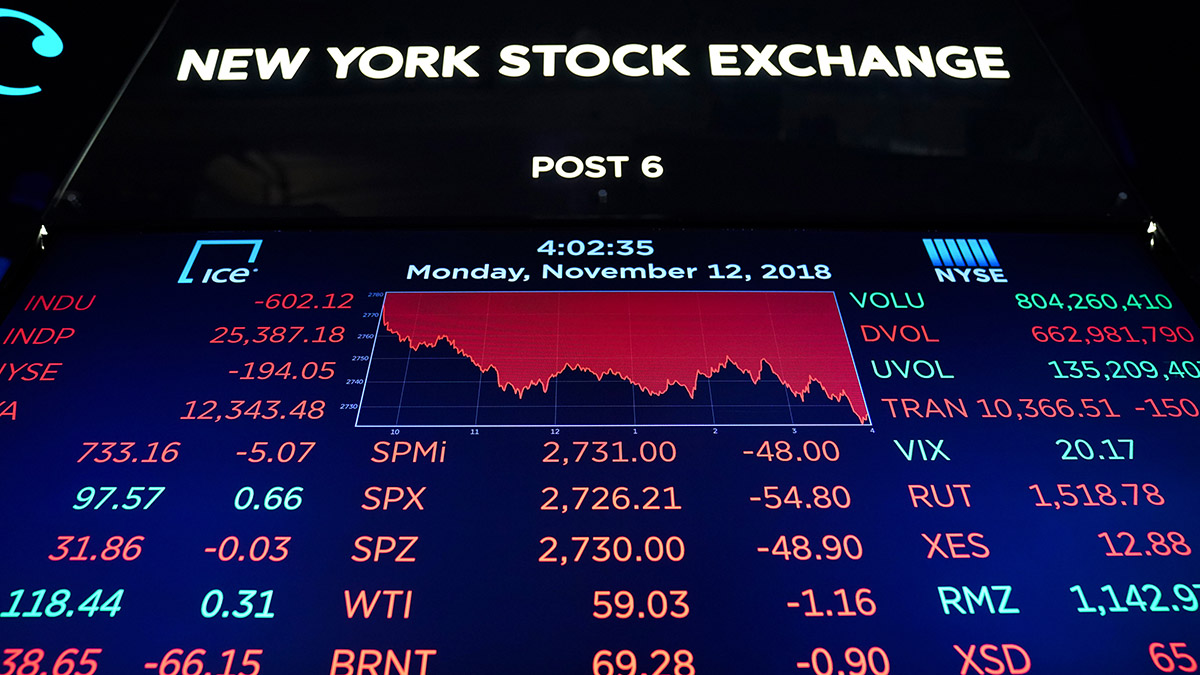

### Data

The data in this analysis are taken from Yahoo! Finance. The SPDR Dow Jones Industrial Average ETF Trust (DIA), SPDR S&P 500 ETF Trust (SPY), and Invesco NASDAQ 100 ETF (QQQM) are exchange-traded funds which invest in the companies listed in the Dow Jones Industrial Average, Standard and Poor's 500, and Nasdaq Composite indices respectively. They can be considerered as 'aggregate' stocks. They can be traded multiple times a day in the stock markets they are listed on. These indices are listings of companies, tracking prices. The prerequite to being included varies from index to index. For example, S & P 500 tracks 500 large companies listed in stock markets in the United States, while Nasdaq Composite tracks most of the stocks listed in the Nasdaq stock exchange. Bitwise (BITW) functions similarly. It tracks and invests in the top ten cryptocurrencies measured by market capitlization (price multiplied by shares outstanding - company stock currently held by all its shareholders). Lastly, Amplify Transformational Data Sharing ETF (BLOK) invests in crypto and blockchain related industries. These industries include, but are not limited to crypto mining, semiconductors, private blockchain, software, and hardware equipment. Additionally, it partitions investments among North American, Asian, and European markets. The companies they invest in vary in market capitalization size. 

- Bitwise - ETF (Tracks top ten cryptocurrency by measure of market capitalization)
- SPY - ETF (Exchange-Traded Fund that tracks SP500 Index)
- QQQM - ETF (Exchange-Traded Fund that tracks NASDAQ Composite Index)
- DIA - ETF (Exchange-Traded Fund that tracks Dow Jones Industrial Average Index)
- BLOK - Index Fund (Crypto and Blockchain Related Industries)

All datasets contain the columns 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'. 'Open' and 'Close' are the prices of the ETFs taken at 9:30 AM and 4:00 PM. The 'High' and 'Low' are points during the day that marks the peak and trough of each ETF's price. The adjusted close ('Adj Close') is the price of the ETF after corporate actions which may affect valuation after accounting. DIA, SPY, and BLOK start on March 3rd, 2020. BITW starts on December 10, 2020 and QQQM starts on October 13, 2020. All data end on November 17, 2021. The rows are timestamped with the day of month only for weekdays, it does not include data from weekends and bank holidays (stock markets are closed). 

### Methods

The methods this analysis use are 

### Importing Necessary Packages 

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from fbprophet import Prophet

from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

### Creating Dataframes for Each ETF/Index

In [2]:
bitwise = pd.read_csv('BITWISE.csv')
nasdaq = pd.read_csv('QQQM.csv')
dowjones = pd.read_csv('DIA.csv')
blok = pd.read_csv('BLOK.csv')
sp500 = pd.read_csv('SPY.csv')

In [3]:
bitwise.head()

Date       Open        High        Low       Close   Adj Close  \
0  2020-12-10  32.000000   49.000000  31.049999   36.400002   36.400002   
1  2020-12-11  40.009998   46.500000  36.500000   38.480000   38.480000   
2  2020-12-14  43.990002   65.000000  43.980000   59.799999   59.799999   
3  2020-12-15  63.900002   93.400002  63.099998   81.500000   81.500000   
4  2020-12-16  95.010002  147.000000  95.000000  139.009995  139.009995   

   Volume  
0  878400  
1  537000  
2  703700  
3  770300  
4  800900

In [4]:
bitwise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       235 non-null    object 
 1   Open       235 non-null    float64
 2   High       235 non-null    float64
 3   Low        235 non-null    float64
 4   Close      235 non-null    float64
 5   Adj Close  235 non-null    float64
 6   Volume     235 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.0+ KB


In [5]:
nasdaq.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-10-13  121.080002  121.970001  120.559998  121.050003  120.420715   
1  2020-10-14  121.330002  121.719002  119.369003  119.970001  119.346336   
2  2020-10-15  118.029999  119.279999  117.789001  119.107002  118.487816   
3  2020-10-16  119.900002  120.410004  118.500000  118.500000  117.883972   
4  2020-10-19  119.830002  119.830002  116.235001  116.449997  115.844627   

   Volume  
0   13100  
1   37800  
2   30600  
3   51000  
4   50600

In [6]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       277 non-null    object 
 1   Open       277 non-null    float64
 2   High       277 non-null    float64
 3   Low        277 non-null    float64
 4   Close      277 non-null    float64
 5   Adj Close  277 non-null    float64
 6   Volume     277 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.3+ KB


In [7]:
blok.head()

Date       Open       High        Low      Close  Adj Close  Volume
0  2020-02-03  18.920000  19.108000  18.920000  18.950001  18.590141   21300
1  2020-02-04  19.299999  19.365999  19.219999  19.250000  18.884443   18700
2  2020-02-05  19.379999  19.410000  19.292999  19.400000  19.031595   31100
3  2020-02-06  19.400000  19.480000  19.400000  19.448000  19.078684   13400
4  2020-02-07  19.370001  19.440001  19.351999  19.360001  18.992355   11200

In [8]:
blok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       452 non-null    object 
 1   Open       452 non-null    float64
 2   High       452 non-null    float64
 3   Low        452 non-null    float64
 4   Close      452 non-null    float64
 5   Adj Close  452 non-null    float64
 6   Volume     452 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.8+ KB


In [9]:
sp500.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-02-03  323.350006  326.160004  323.220001  324.119995  315.095734   
1  2020-02-04  328.070007  330.010010  327.720001  329.059998  319.898224   
2  2020-02-05  332.269989  333.089996  330.670013  332.859985  323.592407   
3  2020-02-06  333.910004  334.190002  332.799988  333.980011  324.681244   
4  2020-02-07  332.820007  333.989990  331.600006  332.200012  322.950806   

     Volume  
0  69083000  
1  62573200  
2  65951100  
3  50359700  
4  64139400

In [10]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       453 non-null    object 
 1   Open       453 non-null    float64
 2   High       453 non-null    float64
 3   Low        453 non-null    float64
 4   Close      453 non-null    float64
 5   Adj Close  453 non-null    float64
 6   Volume     453 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.9+ KB


In [11]:
dowjones.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-02-03  283.690002  286.260010  283.500000  283.980011  274.474182   
1  2020-02-04  287.679993  289.000000  287.420013  288.040009  278.398224   
2  2020-02-05  290.760010  293.040009  289.950012  292.859985  283.056885   
3  2020-02-06  294.019989  294.140015  292.450012  293.739990  283.907440   
4  2020-02-07  292.760010  292.809998  290.660004  291.190002  281.442871   

    Volume  
0  3157400  
1  3004100  
2  3305900  
3  2857200  
4  3839300

In [12]:
dowjones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       453 non-null    object 
 1   Open       453 non-null    float64
 2   High       453 non-null    float64
 3   Low        453 non-null    float64
 4   Close      453 non-null    float64
 5   Adj Close  453 non-null    float64
 6   Volume     453 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.9+ KB


### Turning Dates Column to DateTime Index and Creating Rows for Weekends

In order to parse through the dataframe meaningfully as time series, we will have to convert the 'Date' column to the datatype *DateTime* and set it as the dataframe index. Additionally, in order to model the time series from these dataframes, it is necessary to create columns for weekend dates not originally included in the dataframes. 

In [13]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df['Date'].values, format='%Y-%m-%d')

In [14]:
dowjones['Date'] = get_datetimes(dowjones)
bitwise['Date'] = get_datetimes(bitwise)
blok['Date'] = get_datetimes(blok)
sp500['Date'] = get_datetimes(sp500)
nasdaq['Date'] = get_datetimes(nasdaq)

In [15]:
print(dowjones['Date'].dtypes)
print(bitwise['Date'].dtypes)
print(blok['Date'].dtypes)
print(sp500['Date'].dtypes)
print(nasdaq['Date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [16]:
def weekends(df):
    """Takes in dataframe and creates rows for dates of weekends not included in original dataframe
    
    Parameter:
    df: pandas DataFrame"""
    
    s = pd.DataFrame()
    s['Date'] = pd.date_range(df.Date.min(), df.Date.max(), freq = 'D')
    s['Date'] = get_datetimes(s)
    df_new = df.merge(s, on= 'Date', how='outer', sort= True, copy= False)
    
    return df_new

In [17]:
s = pd.DataFrame()
s['Date'] = pd.date_range(dowjones.Date.min(), dowjones.Date.max(), freq = 'D')

In [18]:
s['Date'] = get_datetimes(s)

In [19]:
dowjones = dowjones.merge(s, on= 'Date', how= 'outer', sort = True, copy = False)

In [20]:
sp500 = weekends(sp500)
nasdaq = weekends(nasdaq)
bitwise = weekends(bitwise)
blok = weekends(blok)

In [21]:
dowjones.set_index('Date', drop= True, inplace= True)
bitwise.set_index('Date', drop= True, inplace= True)
blok.set_index('Date', drop= True, inplace= True)
sp500.set_index('Date', drop= True, inplace= True)
nasdaq.set_index('Date', drop= True, inplace= True)

In [22]:
print(len(dowjones))
print(len(bitwise))
print(len(blok))
print(len(nasdaq))
print(len(sp500))

653
341
652
400
653


### Filling Null Values for Weekend Rows

In [23]:
dowjones.loc[dowjones['Open'].isna() == False].head(7)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-03  283.690002  286.260010  283.500000  283.980011  274.474182   
2020-02-04  287.679993  289.000000  287.420013  288.040009  278.398224   
2020-02-05  290.760010  293.040009  289.950012  292.859985  283.056885   
2020-02-06  294.019989  294.140015  292.450012  293.739990  283.907440   
2020-02-07  292.760010  292.809998  290.660004  291.190002  281.442871   
2020-02-10  290.200012  292.959991  290.160004  292.950012  283.143890   
2020-02-11  294.350006  294.420013  292.279999  292.940002  283.134186   

               Volume  
Date                   
2020-02-03  3157400.0  
2020-02-04  3004100.0  
2020-02-05  3305900.0  
2020-02-06  2857200.0  
2020-02-07  3839300.0  
2020-02-10  2877700.0  
2020-02-11  1994500.0

In [24]:
dowjones.loc[dowjones['Open'].isna() == True].head(7)

Open  High  Low  Close  Adj Close  Volume
Date                                                 
2020-02-08   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-09   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-15   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-16   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-17   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-22   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-23   NaN   NaN  NaN    NaN        NaN     NaN

In [25]:
dowjones.fillna(method='ffill', inplace = True)
sp500.fillna(method='ffill', inplace = True)
nasdaq.fillna(method='ffill', inplace = True)
bitwise.fillna(method='ffill', inplace = True)
blok.fillna(method='ffill', inplace = True)

### Initial Data Exploration

This portion aims to look at the trends and observations we can make out by looking at the surface of the data. These are shown in price fluctuation within the period each dataset, standard deviations, means, and price distributions. 

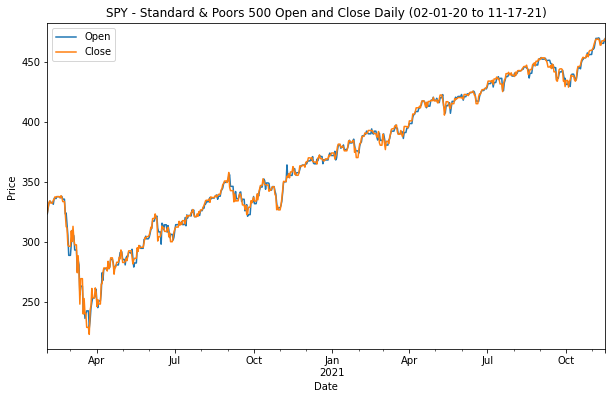

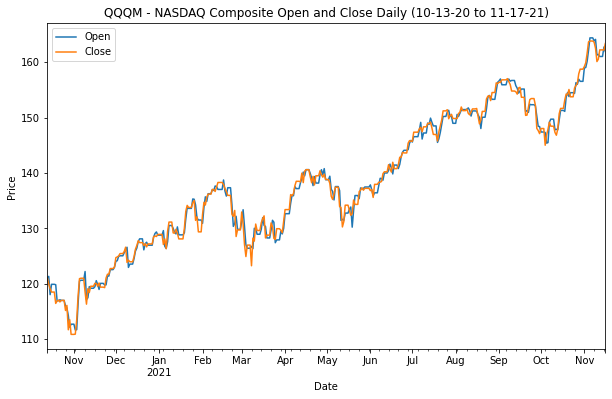

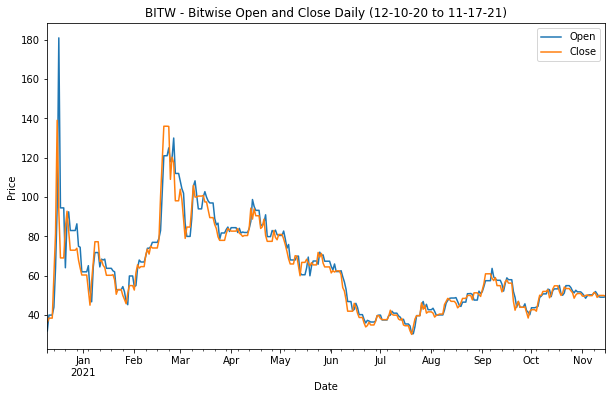

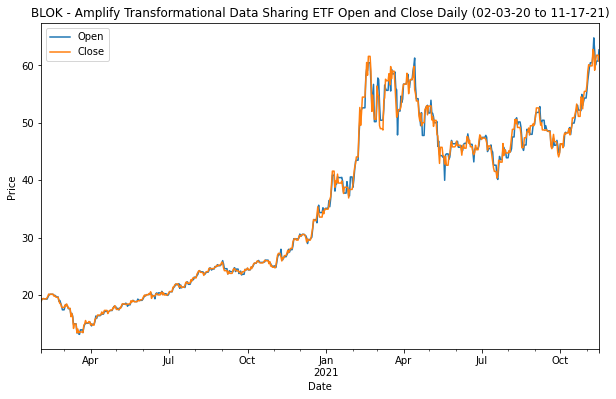

In [26]:
dowjones[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('DIA - Dow Jones Industrial Average Open and Close Daily (02-01-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
sp500[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('SPY - Standard & Poors 500 Open and Close Daily (02-01-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
nasdaq[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('QQQM - NASDAQ Composite Open and Close Daily (10-13-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
bitwise[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('BITW - Bitwise Open and Close Daily (12-10-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
blok[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('BLOK - Amplify Transformational Data Sharing ETF Open and Close Daily (02-03-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();

DIA, QQQM, and SPY all possess an obvious upward linear trend. DIA and SPY's graphs exemplify the dip in global markets in response to growing social and financial limitations SARS-COV19 placed on trans-industry institutions. This dip, occuring in March 2020, was followed by a sharp recovery; one which has yet to see siginifanct pullback. Bitwise's price action within the year shows a more stationary price action with a siginificant drop in volatility around early 2021. Blok on the other hand shows an upward linear trend similar to traditional stock market etfs. However, this slope is less steep and more prone to volatility. This could be due to Blok's investment stratedgy. It only invests in cryptocurrency, but in industries closely linked to blockchain in general such as conductors, mining parts, and energy. Lastly, there are no clear divergences between opening and closing data that would signify a large change in price within a single trading day amongst DIA, SPY, QQQM, and BLOK. Bitwise during the month of January 2021, experiences a siginificant drop in valuation within a single day. 

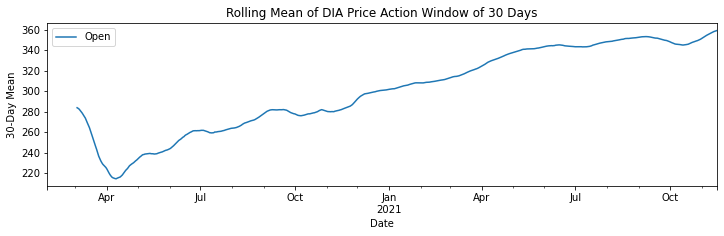

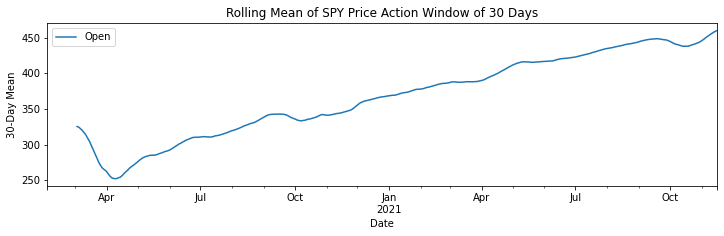

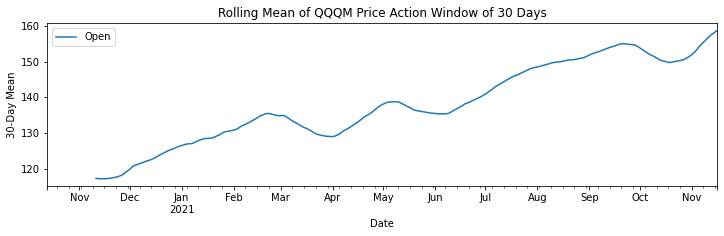

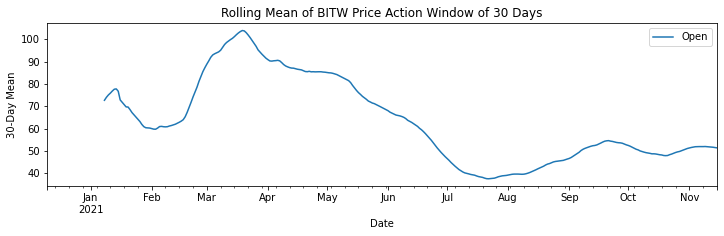

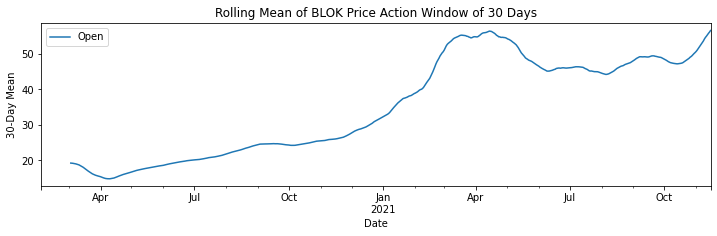

In [27]:
dowjones['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of DIA Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();
sp500['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of SPY Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();
nasdaq['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of QQQM Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();
bitwise['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of BITW Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();
blok['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of BLOK Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();

Unsurprisngly, the monthly return on investment with traditional market ETFS exhibit continuous increases. BITW's monthly ROI takes a sharp downturn around April of 2021, coinciding with the bear market experienced by the crypto market. However, this sharp downturn does not seem affect BLOK's performance around the same period, showing an upward linear trend. 

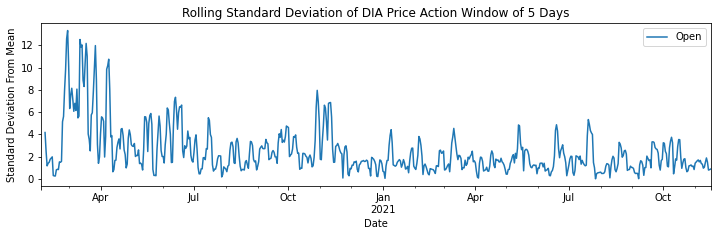

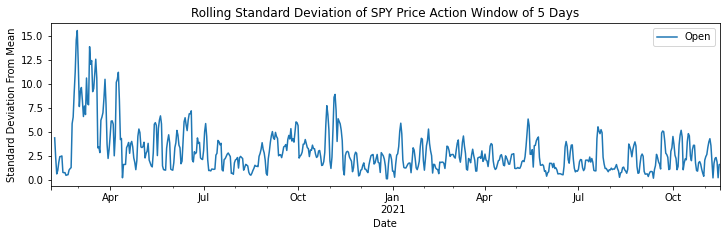

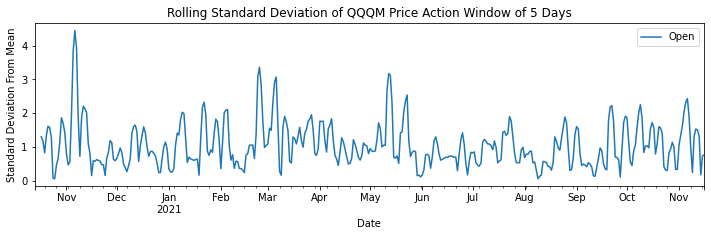

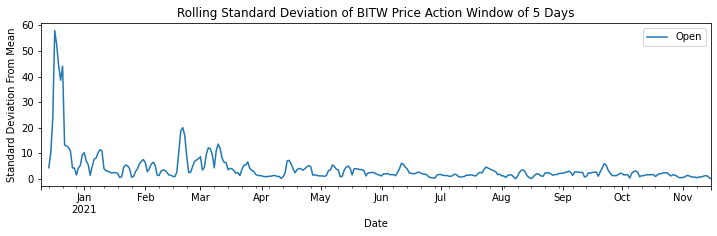

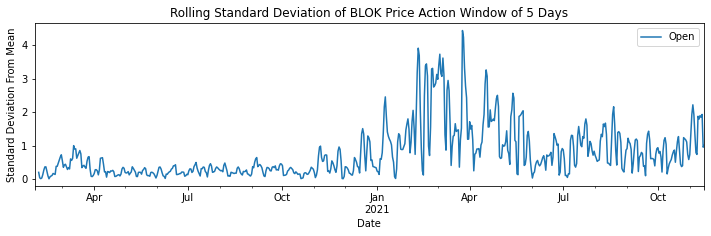

In [28]:
dowjones['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of DIA Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();
sp500['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of SPY Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();
nasdaq['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of QQQM Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();
bitwise['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of BITW Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();
blok['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of BLOK Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();

The 7-day rolling standard deviation graphs above further illustrates the more volatile nature of crypto-based ETFS in comparison to traditional market ETFs. DIA, SPY, and QQQM exhibit better stationarity while BITW and BLOK exhibit diminishing rolling standard deviation and increasing rolling standard deviation respectively.

In [29]:
def boxit(DataFrame, column):
    """ Returns boxplot of chosen independent column and dependent column.
        
        Parameters:
        DataFrame: A Pandas DataFrame
        Independent: Column or feature from dataframe to be chosen as the predictor variable
        """
    fig, ax = plt.subplots(figsize= (20, 3), sharey = True)
    ax = sns.boxplot(data = DataFrame, x = column)
    ax.set_title('Distribution of Opening Values')
    ax.set_xlabel('Opening Values')
    return

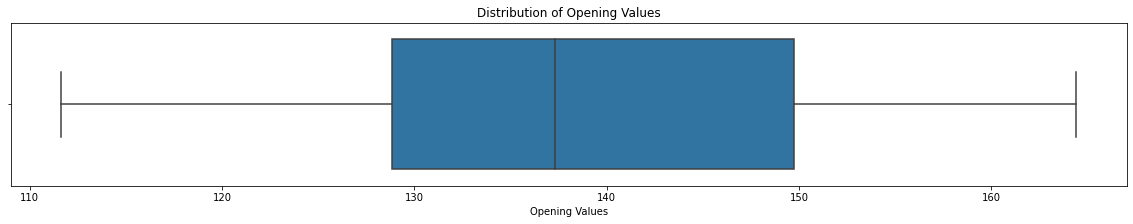

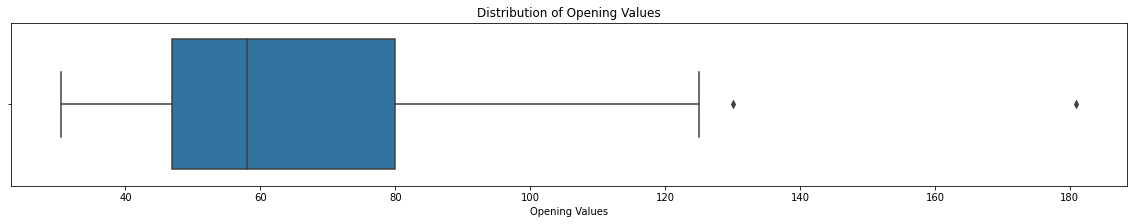

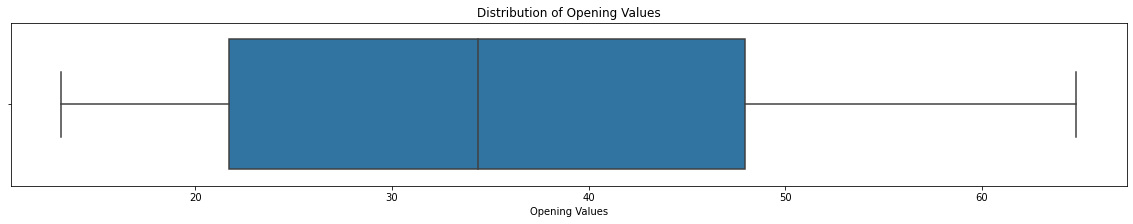

In [30]:
boxit(dowjones, 'Open')
boxit(sp500, 'Open')
boxit(nasdaq, 'Open')
boxit(bitwise, 'Open')
boxit(blok, 'Open')

With the exception of BITW, the whiskers of the boxplots show that price ranges of each exchange traded fund mirrors the time dependent nature of each ETF's price fluctuations. The starting and ending opening prices of DIA, SPY, QQQM, and BLOK are visualized by the whiskers in the boxplots. BITW shows the peak it reached early in January 2021. The traditional market funds also exhibit positive-skewness.

### Feature Engineering

We will create a column as 'daily_price' that will add the values of columns 'Open', 'Close', 'High', 'Low', and 'Adj Close' and use the quotient for the row values. This is so that we can time series using the price action from throughout the whole day as a single datapoint.

In [31]:
def price_quotient(df):
    """Takes in dataframe and calculates mean of several columns 
    to create a new column called 'daily_price
    
    Parameters:
    df: Pandas DataFrame"""
    
    sums = df['Open'] + df['Close'] + df['High'] + df['Low'] + df['Adj Close']
    return sums/5

In [32]:
dowjones['daily_price'] = price_quotient(dowjones)
sp500['daily_price'] = price_quotient(sp500)
nasdaq['daily_price'] = price_quotient(nasdaq)
bitwise['daily_price'] = price_quotient(bitwise)
blok['daily_price'] = price_quotient(blok)

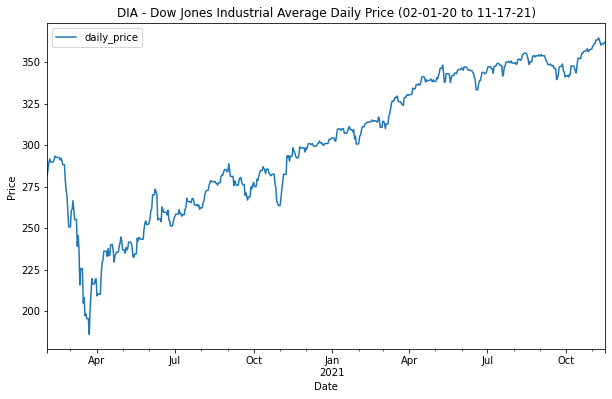

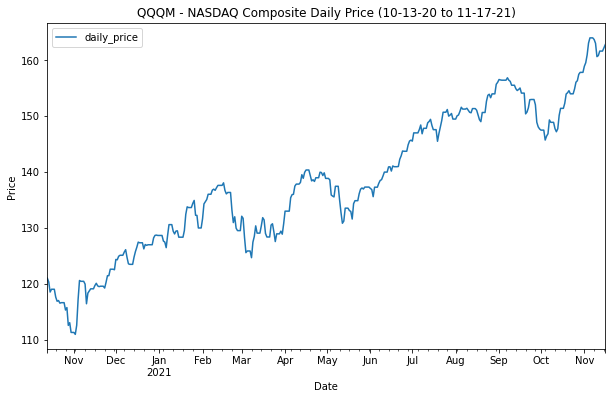

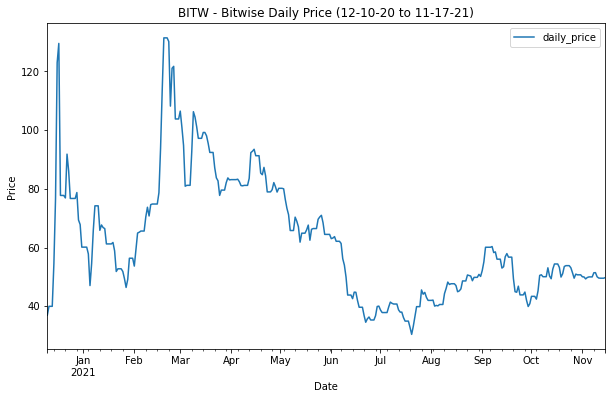

In [33]:
dowjones['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('DIA - Dow Jones Industrial Average Daily Price (02-01-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
sp500['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('SPY - Standard & Poors 500 Daily Price (02-01-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
nasdaq['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('QQQM - NASDAQ Composite Daily Price (10-13-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
bitwise['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('BITW - Bitwise Daily Price (12-10-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
blok['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('BLOK - Amplify Transformational Data Sharing ETF Daily Price (02-03-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();

The trends and price movements do not change drastically from the initial visualization of the 'Open' and 'Close' columns only.

### Stationarity Check

Below, we use the Dickey-Fuller test to measure the stationarity of each time series. The Dickey-Fuller Test tests the hypothesis that a unit root is present in time series models. The unit root is simply a value which indicates the time series will need to be differenced in order for it to be stationary. Lower test statistic scores are ideal for better stochastic proccesses (more random, and less time dependent time series). 

In [34]:
def stationarity_check(TS, column):
    """Takes in TimeSeries DataFrame and column"""
    
    # Calculate rolling statistics
    roll_mean = TS[column].rolling(window=8, center=False).mean()
    roll_std = TS[column].rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column][1:])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS[column], color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

In [35]:
stationarity_check(dowjones,'daily_price')

Results of Dickey-Fuller Test: 

Test Statistic                  -0.682574
p-value                          0.851212
#Lags Used                      11.000000
Number of Observations Used    640.000000
Critical Value (1%)             -3.440609
Critical Value (5%)             -2.866067
Critical Value (10%)            -2.569181
dtype: float64


In [36]:
stationarity_check(sp500,'daily_price')

Results of Dickey-Fuller Test: 

Test Statistic                  -0.318217
p-value                          0.922884
#Lags Used                      13.000000
Number of Observations Used    638.000000
Critical Value (1%)             -3.440641
Critical Value (5%)             -2.866081
Critical Value (10%)            -2.569188
dtype: float64


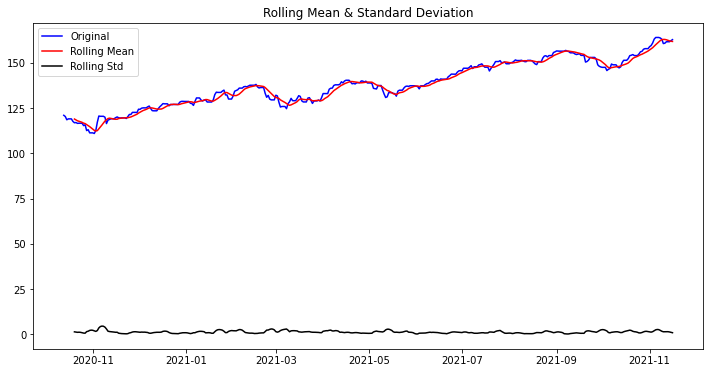

Results of Dickey-Fuller Test: 

Test Statistic                  -0.680692
p-value                          0.851688
#Lags Used                       1.000000
Number of Observations Used    397.000000
Critical Value (1%)             -3.446930
Critical Value (5%)             -2.868848
Critical Value (10%)            -2.570663
dtype: float64


In [37]:
stationarity_check(nasdaq,'daily_price')

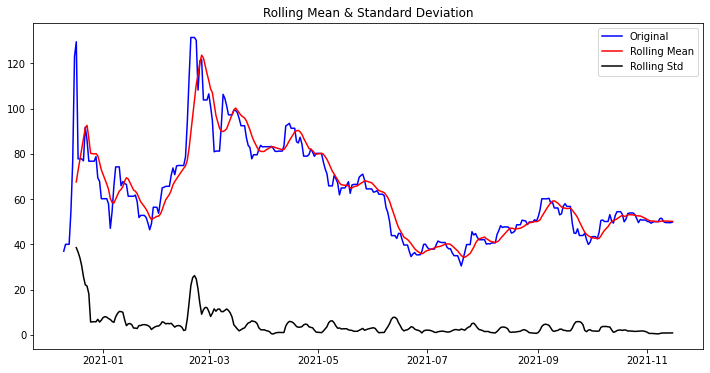

Results of Dickey-Fuller Test: 

Test Statistic                  -3.225854
p-value                          0.018536
#Lags Used                       1.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64


In [38]:
stationarity_check(bitwise,'daily_price')

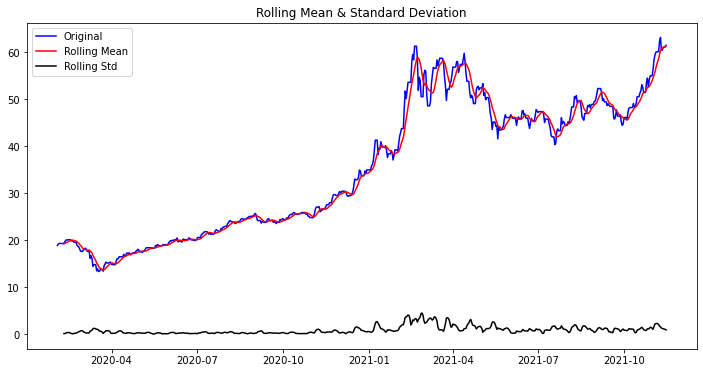

Results of Dickey-Fuller Test: 

Test Statistic                  -0.022014
p-value                          0.956673
#Lags Used                      16.000000
Number of Observations Used    634.000000
Critical Value (1%)             -3.440706
Critical Value (5%)             -2.866110
Critical Value (10%)            -2.569203
dtype: float64


In [39]:
stationarity_check(blok,'daily_price')

Unsurprisingly, none of the data exhibit stationarity. The test statisstic score for all five fail to be lower than the critical value at 1, 5, and 10 percent. Thus we fail to reject the null hypothesis that the unit root does not exist for the data. We will address the problem of stationarity by first conducting decomposition. Later, we will use SARIMAX to grid search the best parameters for pdq and PDQ (seasonality) to further hone models and further iterations. 

### Tracking Daily Percent Return 

Creating a column that shows the percent difference between the each day's price could provide us with a time series that is less time dependent. Historically, in a properly functioning economy, returns do tend to fluctuate around a small positive value. Note that in the case of a stock index it is a bit more complicated, since underperforming companies leave the index and better performing companies are added, so the return on the index tends to be higher than what you would expect for an individual company.

In [40]:
def perc_column(df):
    """Takes in dataframe and creates column called 'Percent' that tracks changes in daily value
    
    Parameters:
    df: pandas DataFrame"""
    
    df['return_daily_perc'] = df['daily_price'].pct_change()
    return df['return_daily_perc']

In [41]:
dowjones['return_daily_perc'] = perc_column(dowjones)
sp500['return_daily_perc'] = perc_column(sp500)
nasdaq['return_daily_perc'] = perc_column(nasdaq)
bitwise['return_daily_perc'] = perc_column(bitwise)
blok['return_daily_perc'] = perc_column(blok)

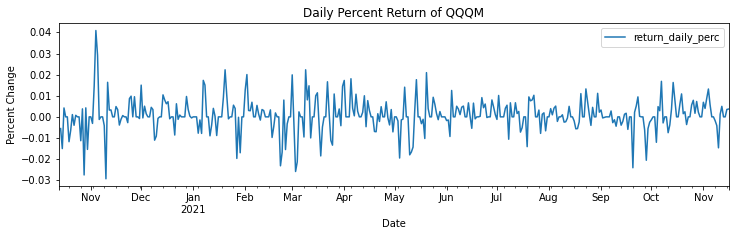

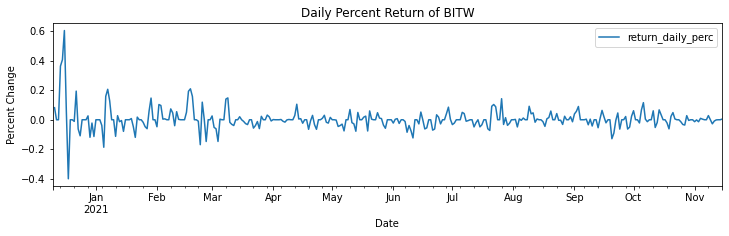

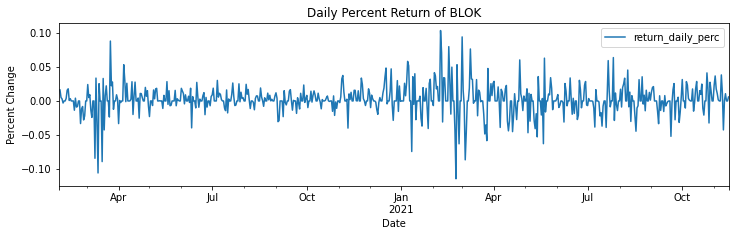

In [42]:
dowjones['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of DIA')
plt.ylabel('Percent Change')
plt.show();
sp500['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of SPY')
plt.ylabel('Percent Change')
plt.show();
nasdaq['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of QQQM')
plt.ylabel('Percent Change')
plt.show();
bitwise['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of BITW')
plt.ylabel('Percent Change')
plt.show();
blok['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of BLOK')
plt.ylabel('Percent Change')
plt.show();

For all five ETFs/Index Fund, the graph of daily percent return appears to already more stationary than simply plotting the prices for each. This implies that the percent return is less time-dependent and exhibit more randomness. The next step would be to determine if there are other underlying unit roots by looking at seasonality and residuals. We will do this by applying decomposition to the 'daily_percent' column for all the dataframes. The relatively larege fluctuations in daily percentage return for the first month for DIA and SP500 can be attributed to the global market pullback due to SARS-COV19. 

### Autocorrelation (ACF) and Partial Autocorrelation (PACF)

Prior to using SARIMAX, we will plot the autocorrelation and partial autocorrelation functions to have some idea of the optimal lags for the 'daily_price' column. This can be the basis by which we compare and evaluate the values outputted SARIMAX grid searches.

#### Dow Jones Industrial Average

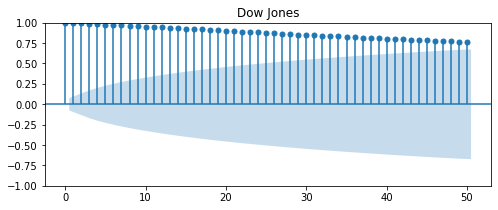

In [43]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(dowjones['daily_price'],ax=ax, lags=50);
ax.set_title('Dow Jones');

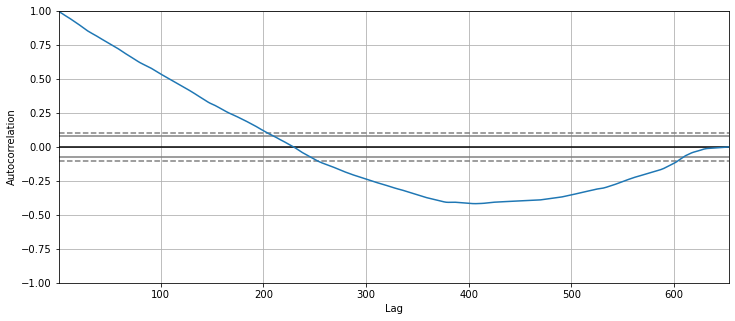

In [44]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(dowjones['daily_price']);

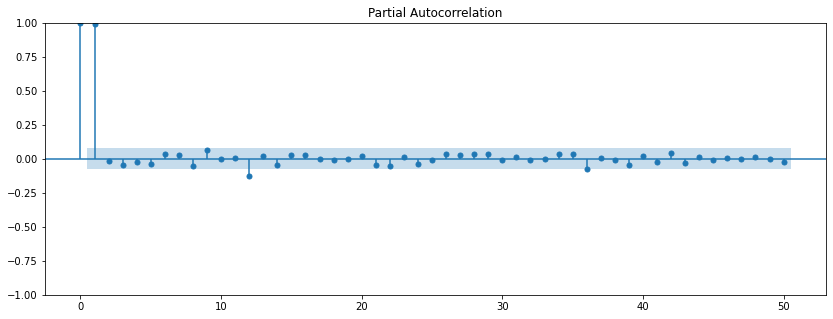

In [45]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(dowjones['daily_price'], lags=50, method='ywm');

#### Standard & Poor's 500

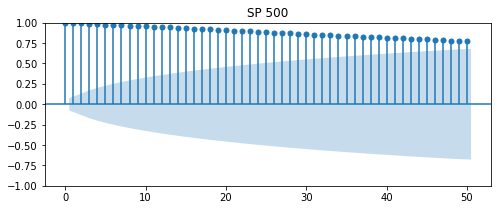

In [46]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(sp500['daily_price'],ax=ax, lags=50);
ax.set_title('SP 500');

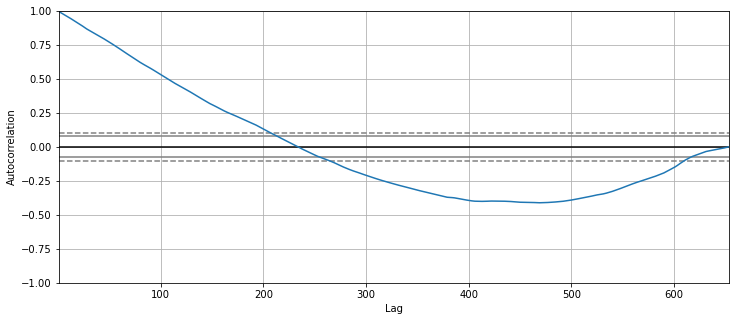

In [47]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(sp500['daily_price']);

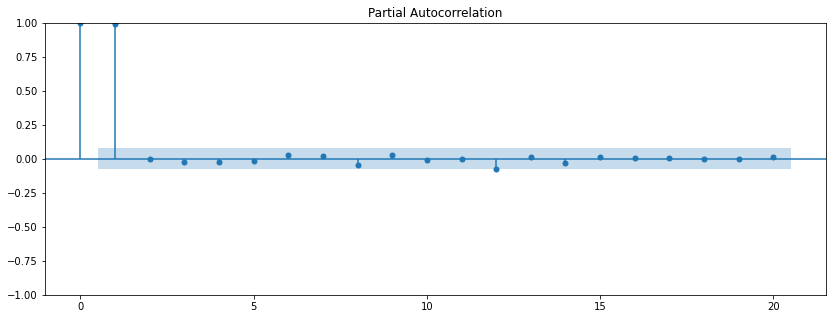

In [48]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(sp500['daily_price'], lags=20, method='ywm');

#### Nasdaq Composite

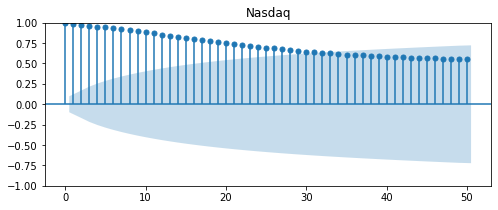

In [49]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(nasdaq['daily_price'],ax=ax, lags=50);
ax.set_title('Nasdaq');

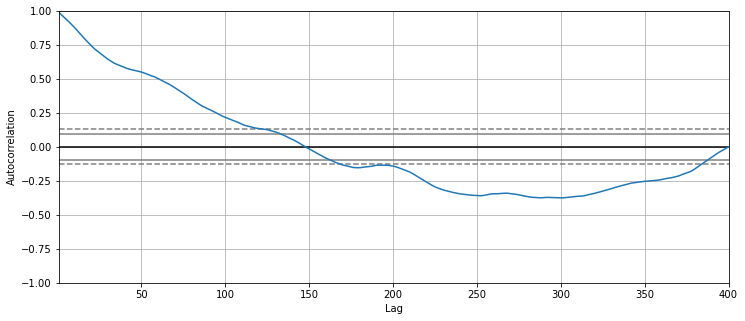

In [50]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nasdaq['daily_price']);

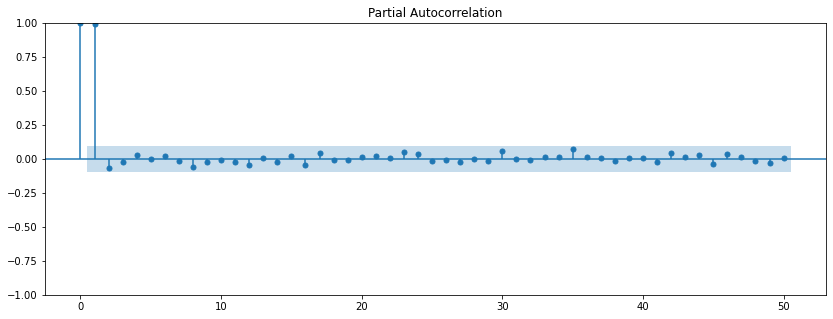

In [51]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(nasdaq['daily_price'], lags=50, method='ywm');

#### Bitwise

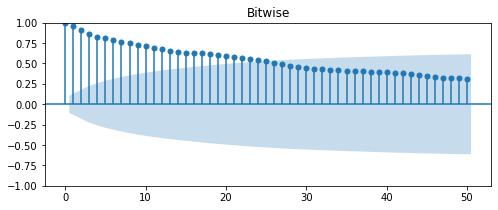

In [52]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(bitwise['daily_price'],ax=ax, lags=50);
ax.set_title('Bitwise');

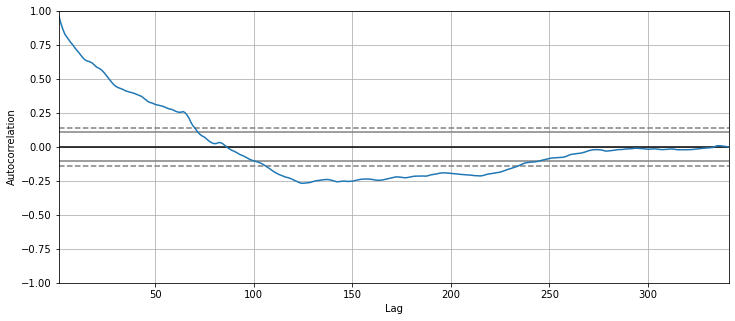

In [53]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(bitwise['daily_price']);

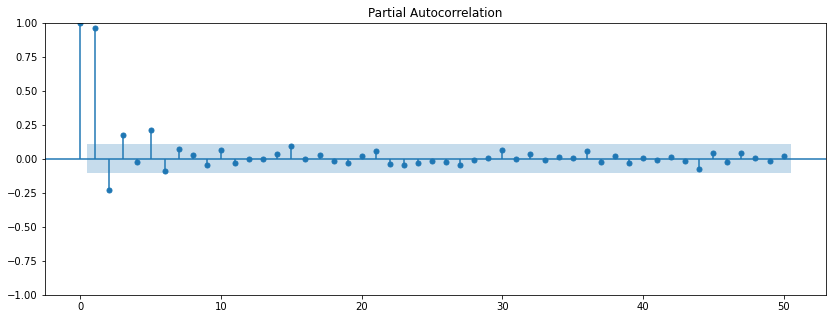

In [54]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(bitwise['daily_price'], lags=50, method='ywm');

#### Amplify Transformational Data Sharing ETF

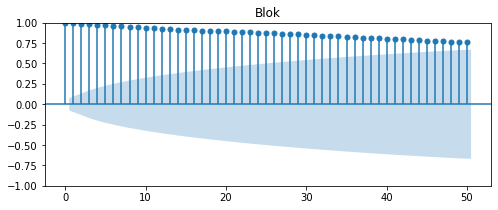

In [55]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(blok['daily_price'],ax=ax, lags=50);
ax.set_title('Blok');

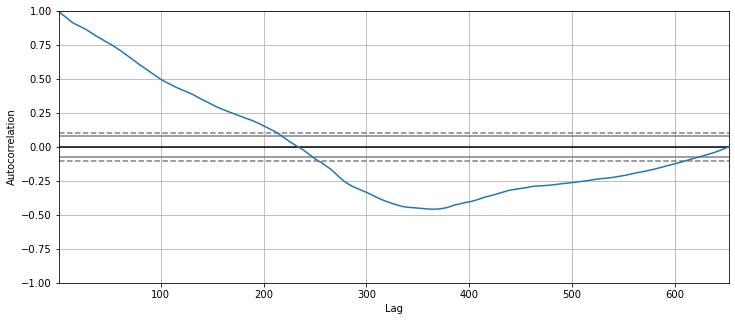

In [56]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(blok['daily_price']);

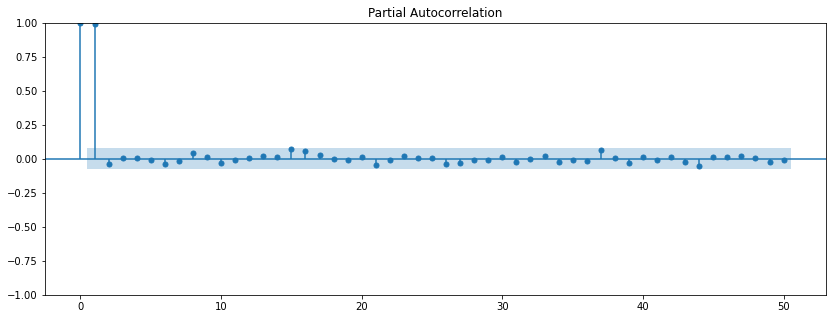

In [57]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(blok['daily_price'], lags=50, method='ywm');

### Decomposition

Decomposing the time series will allow us to look at other unit roots that disrupt stationarity. Namely, these are trends (positive or negative), seasonality, and residuals. All of which, may exhibit some form of time dependency. 

In [58]:
def decompose(df):
    """Takes a pandas DataFrame and plots the trend, seasonality, and residuals of time series
    
    Parameter:
    df: pandas DataFrame"""
    
    decomposition = seasonal_decompose(df['return_daily_perc'][1:], period=5)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(df['return_daily_perc'][1:], label='Original', color='blue')
    plt.legend(loc='best')
    plt.title('Daily Percentage Return')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.title('Seasonality')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.title('Residuals')
    plt.tight_layout()
    
    return None

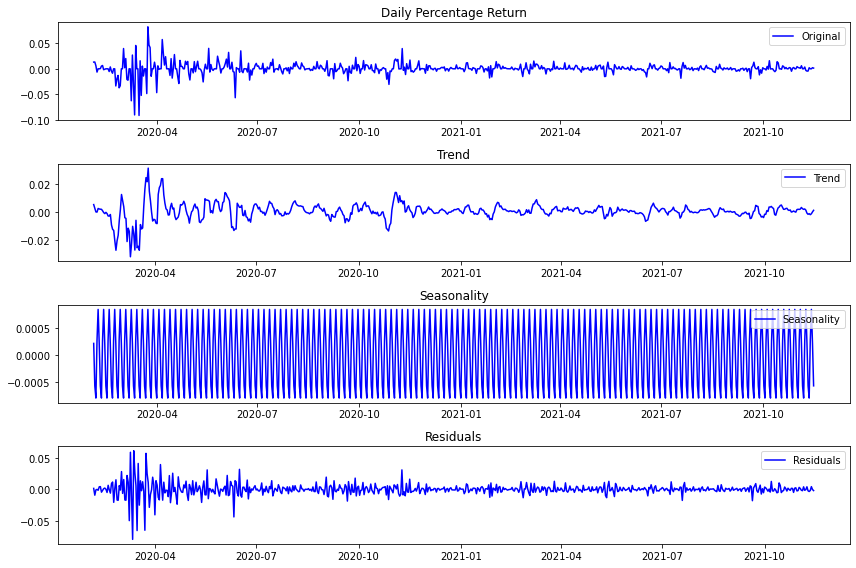

In [59]:
decompose(dowjones)

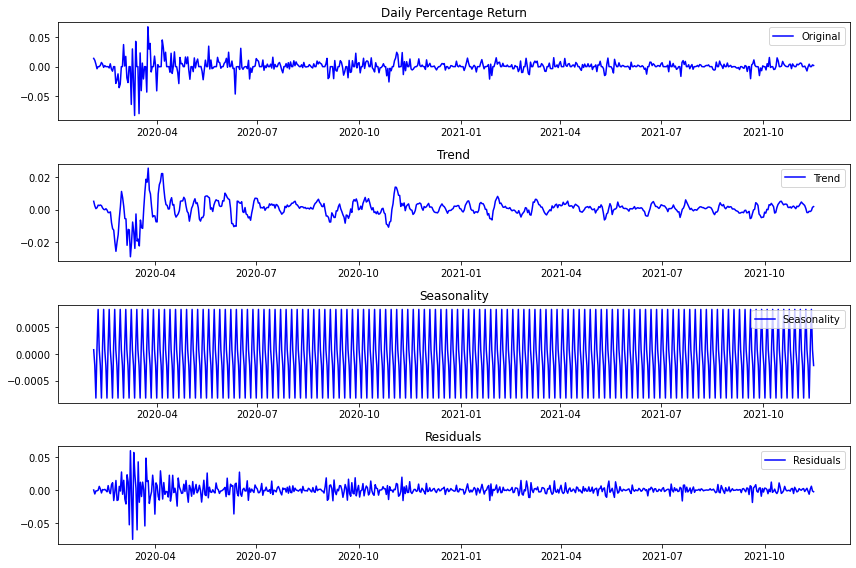

In [60]:
decompose(sp500)

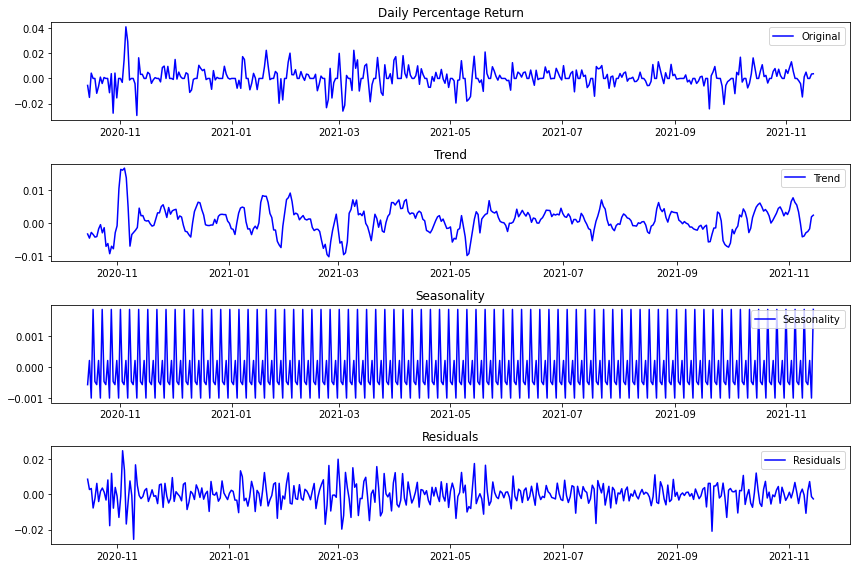

In [61]:
decompose(nasdaq)

In [62]:
decompose(bitwise)

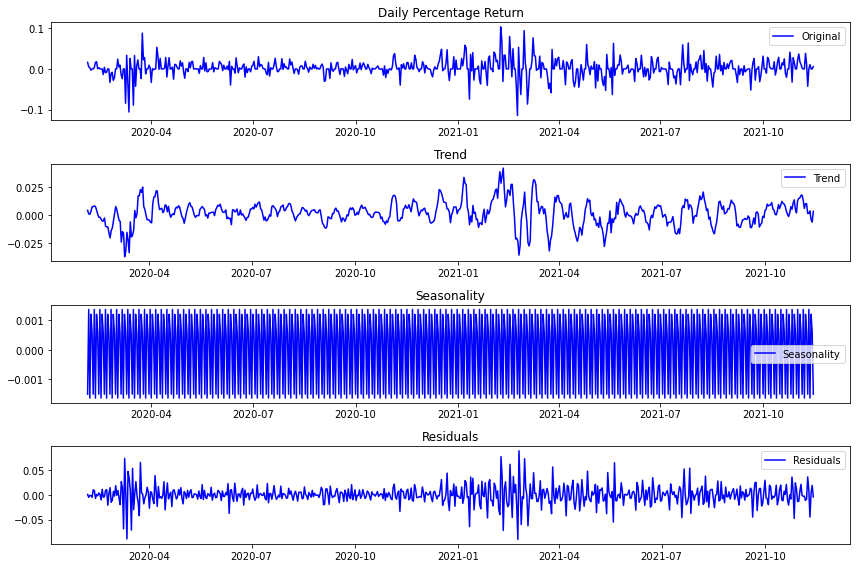

In [63]:
decompose(blok)

The residuals and trend of all of the time series appear to be stationary. With the execption of the global market pullback in March 2020, and the crypto-market pullpack in January of 2021, the trends and random noise do not show time-dependence. The seasonality of the DowJones and SP500 ETFs recur in roughly biweejly cycles. There are about 13-15 troughs in between 3-month periods. Nasdaq's and Bitwise's seasonality follows a weekly cycle, while Blok has a cycle between 1 and 2 weeks. 

### Dickey-Fuller Test & Stationarity Check

The Dickey-Fuller Test tests for the presence of a unit root in a time series. The test stastic that is outputted has a inverse relationship with rejecting the null hypothesis that there is a unit root present in the time series. In other words, if the calculated tau value is less than the critical value in the table of critical values, then we have a significant result; otherwise, we accept the null hypothesis that there is a unit root and the time series is not stationary.

In [64]:
def stationarity_check(TS, column):
    """Takes in TimeSeries DataFrame and column"""
    
    # Calculate rolling statistics
    roll_mean = TS[column].rolling(window=8, center=False).mean()
    roll_std = TS[column].rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column][1:])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS[column], color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

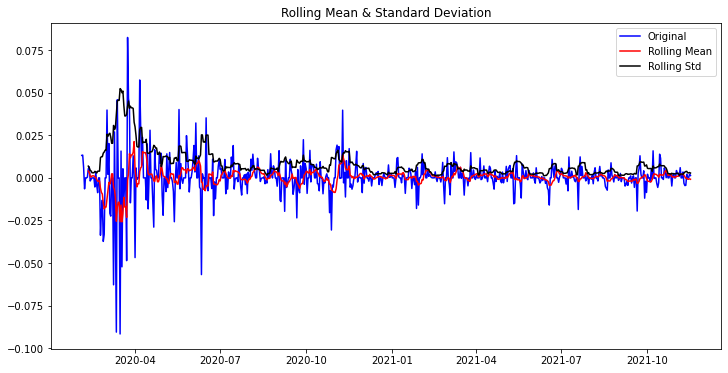

Results of Dickey-Fuller Test: 

Test Statistic                -6.476461e+00
p-value                        1.327401e-08
#Lags Used                     1.400000e+01
Number of Observations Used    6.370000e+02
Critical Value (1%)           -3.440657e+00
Critical Value (5%)           -2.866088e+00
Critical Value (10%)          -2.569192e+00
dtype: float64


In [65]:
stationarity_check(dowjones, 'return_daily_perc')

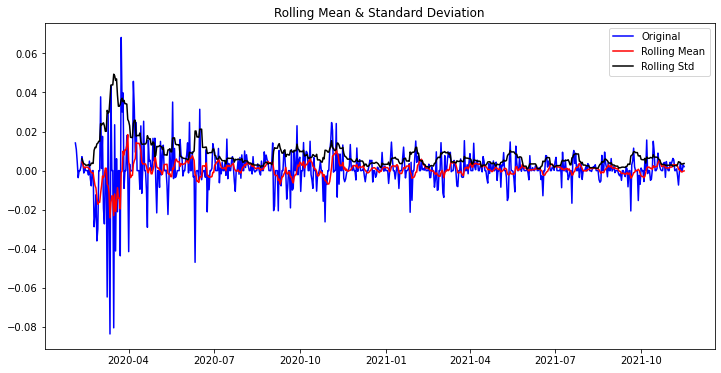

Results of Dickey-Fuller Test: 

Test Statistic                -5.881466e+00
p-value                        3.071263e-07
#Lags Used                     1.400000e+01
Number of Observations Used    6.370000e+02
Critical Value (1%)           -3.440657e+00
Critical Value (5%)           -2.866088e+00
Critical Value (10%)          -2.569192e+00
dtype: float64


In [66]:
stationarity_check(sp500, 'return_daily_perc')

In [67]:
stationarity_check(nasdaq, 'return_daily_perc')

Results of Dickey-Fuller Test: 

Test Statistic                -1.182801e+01
p-value                        8.116242e-22
#Lags Used                     2.000000e+00
Number of Observations Used    3.960000e+02
Critical Value (1%)           -3.446972e+00
Critical Value (5%)           -2.868866e+00
Critical Value (10%)          -2.570673e+00
dtype: float64


In [68]:
stationarity_check(bitwise, 'return_daily_perc')

Results of Dickey-Fuller Test: 

Test Statistic                -1.242581e+01
p-value                        4.041458e-23
#Lags Used                     1.000000e+00
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64


In [69]:
stationarity_check(blok, 'return_daily_perc')

Results of Dickey-Fuller Test: 

Test Statistic                 -23.735120
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    650.000000
Critical Value (1%)             -3.440450
Critical Value (5%)             -2.865997
Critical Value (10%)            -2.569143
dtype: float64


The only time series to exhibit stationarity across 1%, 5%, and 10% critical values is the Nasdaq ETF. Bitwise ETF is able to reject the null hypothesis that there is a unit root at only 1% critical value. Applying a log transformation on these values may help in smoothing out the time series. We will attempt to transform the time series to arrive to an optimal stationary state. However, in the event that we do not, the rolling standard deviation, and rolling mean for these time series do appear to revolve around a set mean and standard deviation to be able to be plugged into ARIMA modeling. 

### Log Transformation

In order to have an optimal time series to be fed into modeling, we will apply log transformations on the column 'return_daily_perc' for all five ETFs/Index Fund. This process should smooth out the the values and create a more stationary time series.

In [70]:
dowjones['log_rdp'] = np.log(dowjones['daily_price'])
log_dow = np.log(dowjones['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_dow, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

In [71]:
sp500['log_rdp'] = np.log(sp500['daily_price'])
log_sp = np.log(sp500['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_sp, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

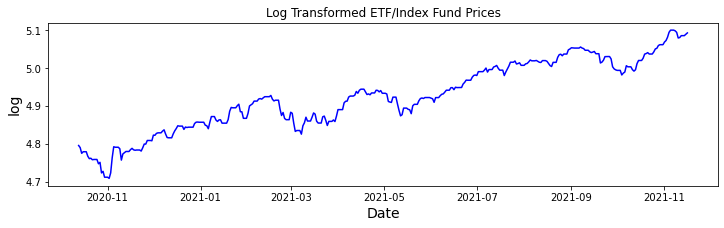

In [72]:
nasdaq['log_rdp'] = np.log(nasdaq['daily_price'])
log_nas = np.log(nasdaq['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_nas, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

In [73]:
bitwise['log_rdp'] = np.log(bitwise['daily_price'])
log_bit = np.log(bitwise['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_bit, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

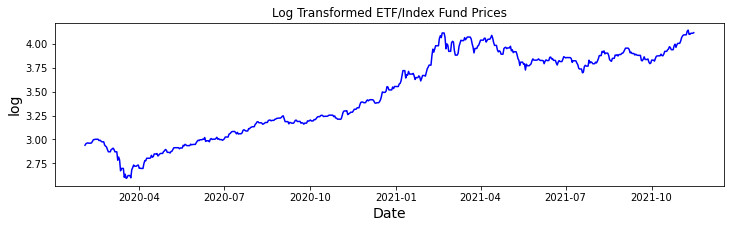

In [74]:
blok['log_rdp'] = np.log(blok['daily_price'])
log_blok = np.log(blok['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_blok, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

In [75]:
def perc_log(df):
    """Takes in dataframe and creates column called 'Percent' that tracks changes in daily value
    
    Parameters:
    df: pandas DataFrame"""
    
    df['log_perc_ret'] = df['log_rdp'].pct_change()
    return df['log_perc_ret']

In [76]:
dowjones['log_perc_ret'] = perc_log(dowjones)

In [77]:
dowjones['log_perc_ret'].plot()
plt.title('Percentage Difference of Log Transformed Prices')
plt.ylabel('Percentage Increase / Decrease');

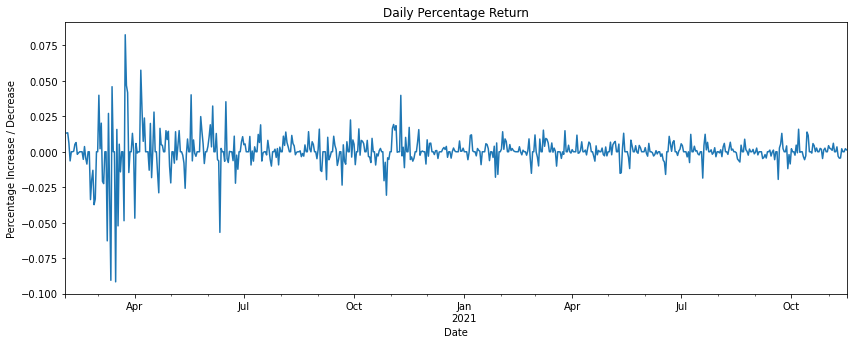

In [78]:
dowjones['return_daily_perc'].plot()
plt.title('Daily Percentage Return')
plt.ylabel('Percentage Increase / Decrease');

Unfortunately, the graphs of 'return_daily_perc' and 'log_perc_ret' which catalogue the daily percentage price movement and the daily percentage movement of the logged values of the original price, the fluctuations appear to be the same. Albeit, the changes range for 'log_perc_ret' is roughly between 0.015 and -.015 while for  'return_daily_perc' is roughly between 0.075 and -.075. 

In [79]:
dowjones['log_perc_ret'].diff().plot()
plt.title('Differenced Percentage of Log Transformed Prices')
plt.ylabel('Percentage Increase / Decrease');

Similarly with the previous comparison between daily percentage return and percentage difference of log transformed data, the difference dataset of logged values do not deviate much in shape. The high degree of oscillation in the beginning period of the time series remains. For this reason, we will choose to stick with the column 'return_daily_perc' in our time series models. Log transformation and differencing do not make the data stationary, so for simplicity's sake, the regular daily percentage return will be used. 

### Train-Test Split

In order to move ahead with modeling, we create training data and test data. This is done so later model iterations can learn from the training data, and then measure its predictions against actually observed data. We do this for all five ETFs/Index Fund. We will use the 'return_daily_perc' column, an aggregate column of each row's price points throughout the day.

In [80]:
end_dow = round(dowjones['return_daily_perc'].shape[0] * .8)
train_dowjones = dowjones['return_daily_perc'][:end_dow]

end_sp = round(sp500['return_daily_perc'].shape[0] * .8)
train_sp500 = sp500['return_daily_perc'][:end_sp]

end_nas = round(nasdaq['return_daily_perc'].shape[0]* .8)
train_nasdaq = nasdaq['return_daily_perc'][:end_nas]

end_bit = round(bitwise['return_daily_perc'].shape[0]* .8)
train_bitwise = bitwise['return_daily_perc'][:end_bit]

end_blok = round(blok['return_daily_perc'].shape[0] * .8)
train_blok = blok['return_daily_perc'][:end_blok]

In [81]:
test_dowjones = dowjones['return_daily_perc'][end_dow:]
test_sp500 = sp500['return_daily_perc'][end_sp:]
test_nasdaq = nasdaq['return_daily_perc'][end_nas:]
test_bitwise = bitwise['return_daily_perc'][end_bit:]
test_blok = blok['return_daily_perc'][end_blok:]

In [82]:
fig, ax = plt.subplots()
ax.plot(train_dowjones)
ax.plot(test_dowjones)

ax.plot(train_sp500)
ax.plot(test_sp500)

ax.plot(train_nasdaq)
ax.plot(test_nasdaq)

ax.plot(train_bitwise)
ax.plot(test_bitwise)

ax.plot(train_blok)
ax.plot(test_blok)

ax.set_title('Prices of ETFs and Index Fund')
ax.set_xlabel('Date')
ax.set_ylabel('Values');

With the exception of Bitwise, the time series exhibit stationarity. The high degree of time dependent variance shown by Bitwise's time series can be explained by the crypto-market pullback seen in early 2021. The months long bull run following March, 2020 seen in the crypto world needed a much needed respite in order to sustain a positive longterm outlook. 

### Random Walk Model

This second random walk model looks at only the DowJones time series. This is to check if an initial random walk iteration with a lag 41 would be helpful in forecasting. This lag is taken from the value outputted by the Autocorrelation Function graph we plotted earlier. 

In [83]:
random_walk1 = train_dowjones.shift(41)

fig, ax = plt.subplots()

train_dowjones.plot(ax = ax, c ='r', label = 'original')
random_walk1.plot(ax = ax, c ='b', label = 'shifted')
ax.set_title('DowJones Industrial ETF Time Series with Lag of 41 Observed Days')
ax.set_ylabel('Percentage Return Daily');

In [84]:
residuals1 = random_walk1 - train_dowjones
rmse1 = mean_squared_error(train_dowjones[42:], random_walk1.dropna(), squared = False)
rmse1

0.017947143850600054

The root mean squared error of the two time series is quite low, indicating low variance between the two. Attempting either raising or decreasing the number of lags raises the RMSE. This shows that the number of lags will be around 41, a number we can look for when conducting SARIMAX grid search

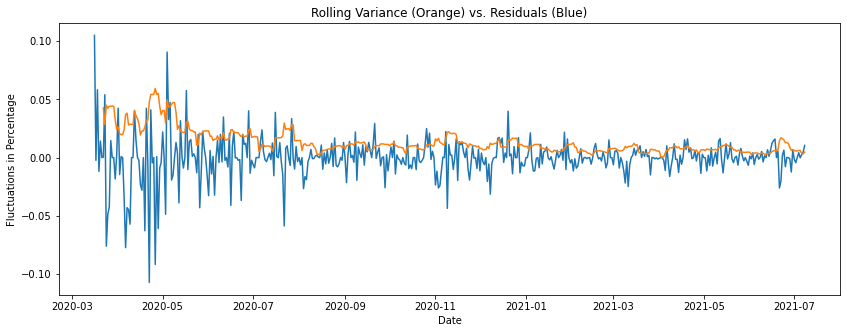

In [85]:
fig, ax = plt.subplots()
ax.plot(residuals1.index, residuals1)
ax.plot(residuals1.index, residuals1.rolling(7).std())
ax.set_title('Rolling Variance (Orange) vs. Residuals (Blue)')
ax.set_ylabel('Fluctuations in Percentage')
ax.set_xlabel('Date');

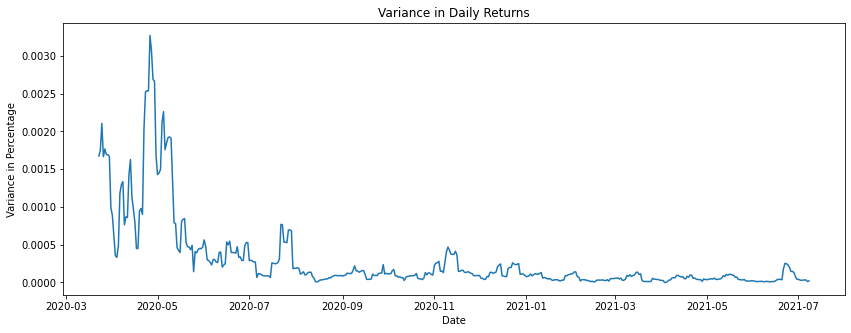

In [86]:
plt.plot(residuals1.index, residuals1.rolling(8).var())
plt.title('Variance in Daily Returns')
plt.xlabel('Date')
plt.ylabel('Variance in Percentage');

The residuals plot of the dowjones train set shows a slight time dependence in variance. The large spike in variance in the beginning of the time series coincides with the market's relatively swift rebound from March, 2020's global financial pullback. 

### ARIMA

ARIMA stands for Autoregressive Integrated Moving Average. In the cells below, we look at the results of modeling by inputting values for the parameters (p,d,q) as shown by the autocorrelation and partial autocorrelation tests. These parametrs perform lag, integration, and error lag on the time series.

#### Integration
Here we plug in a value of 0 to parameter of d in (p,0,q). This differences the time series by an order of 0.

In [87]:
rw1 = ARIMA(train_dowjones[1:], order = (0,0,0)).fit()
rw1.predict(typ= 'levels')

2020-02-04    0.000455
2020-02-05    0.000455
2020-02-06    0.000455
2020-02-07    0.000455
2020-02-08    0.000455
                ...   
2021-07-04    0.000455
2021-07-05    0.000455
2021-07-06    0.000455
2021-07-07    0.000455
2021-07-08    0.000455
Freq: D, Name: predicted_mean, Length: 521, dtype: float64

In [88]:
y_hat_rw1 = rw1.predict(typ = 'levels')
rmse_rw1 = np.sqrt(mean_squared_error(train_dowjones[1:], y_hat_rw1))
rmse_rw1

0.013011988974154287

The non-integrated ARIMA model has a lower root mean square error of ~0.0156 as opposed to a RMSE of ~0.0198 seen with the initial random walk model. 

#### Autoregression

Here we plug in 1 for the paramter of p in (1, d, q). We apply of a lag of 1 onto the time series. Autoregression is a modeling technique that uses observed data from previous time steps to predict values at the next time step. The partial autocorrelation graph showed that after lag 1, the error term ceases to be statistically significant, thus a value of 1 will be used for p.

In [89]:
ar1 = ARIMA(train_dowjones[1:], order = (1,0,0)).fit()
ar1.predict(typ='levels')

2020-02-04    0.000460
2020-02-05    0.000665
2020-02-06    0.000668
2020-02-07    0.000548
2020-02-08    0.000349
                ...   
2021-07-04    0.000453
2021-07-05    0.000453
2021-07-06    0.000453
2021-07-07    0.000394
2021-07-08    0.000452
Freq: D, Name: predicted_mean, Length: 521, dtype: float64

In [90]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      return_daily_perc   No. Observations:                  521
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1522.922
Date:                Thu, 09 Dec 2021   AIC                          -3039.844
Time:                        15:27:30   BIC                          -3027.077
Sample:                    02-04-2020   HQIC                         -3034.843
                         - 07-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.743      0.458      -0.001       0.002
ar.L1          0.0161      0.020      0.806      0.420      -0.023       0.055
sigma2         0.0002   3.65e-06     46.312      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5441.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
print(f'Random Walk AIC: {rw1.aic}')
print(f'AR1 AIC: {ar1.aic}')
print(f'Random Walk AIC: {rw1.aic}')
print(f'AR1 AIC: {ar1.aic}')
# The random walk model produced a lower AIC meaning that it provided a slightly better fit than 
# autoregression model

Random Walk AIC: -3041.709145885303
AR1 AIC: -3039.844195801226
Random Walk AIC: -3041.709145885303
AR1 AIC: -3039.844195801226


In [92]:
y_hat_ar1 = ar1.predict(typ = 'levels')
rmse_ar1 = np.sqrt(mean_squared_error(train_dowjones[1:], y_hat_ar1))
print(rmse_ar1)
print(rmse_rw1)

0.013010304419264694
0.013011988974154287


In [93]:
print(ar1.arparams)

[0.01609201]


In [94]:
# dowjones['return_daily_perc'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
# plt.title('Rolling Mean of DIA Price Action Window of 30 Days')
# plt.ylabel('30-Day Mean')
# plt.show();
# sp500['return_daily_perc'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
# plt.title('Rolling Mean of DIA Price Action Window of 30 Days')
# plt.title('Rolling Mean of SPY Price Action Window of 30 Days')
# plt.ylabel('30-Day Mean')
# plt.show();
# nasdaq['return_daily_perc'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
# plt.title('Rolling Mean of QQQM Price Action Window of 30 Days')
# plt.ylabel('30-Day Mean')
# plt.show();
# bitwise['return_daily_perc'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
# plt.title('Rolling Mean of BITW Price Action Window of 30 Days')
# plt.ylabel('30-Day Mean')
# plt.show();
# blok['return_daily_perc'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
# plt.title('Rolling Mean of BLOK Price Action Window of 30 Days')
# plt.ylabel('30-Day Mean')
# plt.show();

In [95]:
# blok['return_daily_perc'].plot()
# blok['return_daily_perc'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
# plt.title('Rolling Mean of BLOK Price Action Window of 30 Days')
# plt.ylabel('30-Day Mean')
# plt.show()

### Moving Average

The parameter q is the number of forecast errors in the model and is also referred to as the size of the moving average window. Here we plug in a value of 1, looking only at the immediate previous observation to predict the next datapoint after it.

In [96]:
ma1 = ARIMA(train_dowjones, order = (0,0,1)).fit()
y_hat_ma1 = ma1.predict(typ='levels')
y_hat_ma1

2020-02-03    0.000458
2020-02-04    0.000458
2020-02-05    0.000582
2020-02-06    0.000582
2020-02-07    0.000510
                ...   
2021-07-04    0.000453
2021-07-05    0.000453
2021-07-06    0.000453
2021-07-07    0.000418
2021-07-08    0.000453
Freq: D, Name: predicted_mean, Length: 522, dtype: float64

In [97]:
rmse_ma1 = np.sqrt(mean_squared_error(train_dowjones[1:], y_hat_ma1[1:]))
rmse_ma1

0.013010701812779309

In [98]:
print(f'Random Walk AIC: {rw1.aic}')
print(f'AR1 AIC: {ar1.aic}')
print(f'MA1 AIC: {ma1.aic}')

Random Walk AIC: -3041.709145885303
AR1 AIC: -3039.844195801226
MA1 AIC: -3039.812206567395


<AxesSubplot:>

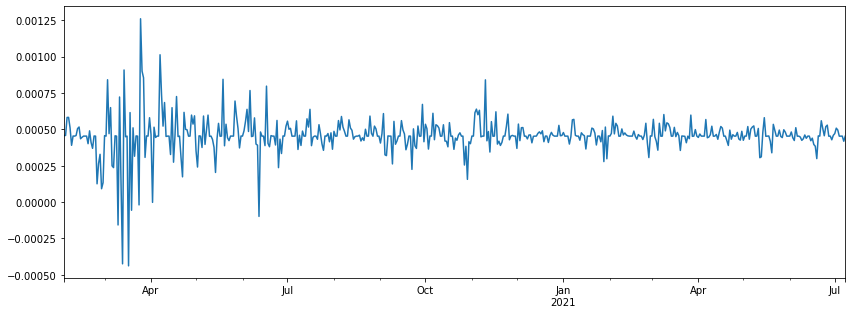

In [99]:
y_hat_ma1.plot()

<AxesSubplot:xlabel='Date'>

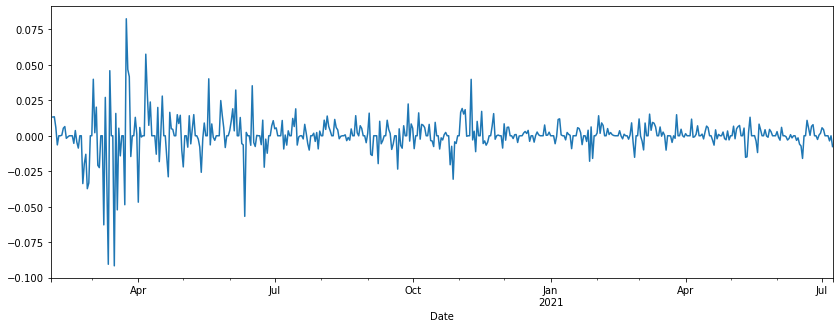

In [100]:
train_dowjones.plot()

The initial random walk model still provides a lower AIC score than either the autoregression or moving averages models. In order to determine what values to plug in the parameters, we will conduct the Auto-Arima grid search below.

### Checking Seasonality for Grid Search

In [101]:
end_dow = round(dowjones['daily_price'].shape[0] * .8)
train_dowjones = dowjones['daily_price'][:end_dow]

end_sp = round(sp500['daily_price'].shape[0] * .8)
train_sp500 = sp500['daily_price'][:end_sp]

end_nas = round(nasdaq['daily_price'].shape[0]* .8)
train_nasdaq = nasdaq['daily_price'][:end_nas]

end_bit = round(bitwise['daily_price'].shape[0]* .8)
train_bitwise = bitwise['daily_price'][:end_bit]

end_blok = round(blok['daily_price'].shape[0] * .8)
train_blok = blok['daily_price'][:end_blok]

In [102]:
test_dowjones = dowjones['daily_price'][end_dow:]
test_sp500 = sp500['daily_price'][end_sp:]
test_nasdaq = nasdaq['daily_price'][end_nas:]
test_bitwise = bitwise['daily_price'][end_bit:]
test_blok = blok['daily_price'][end_blok:]

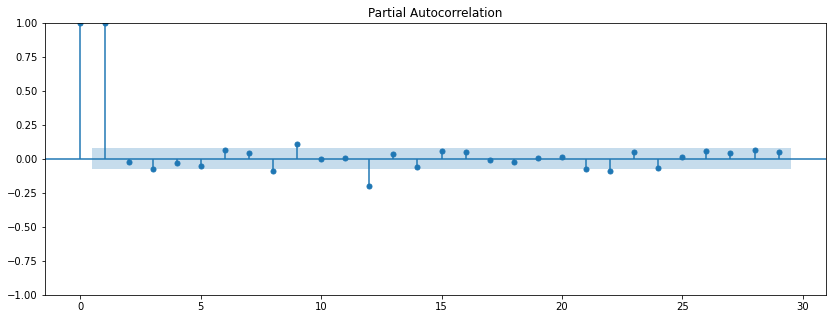

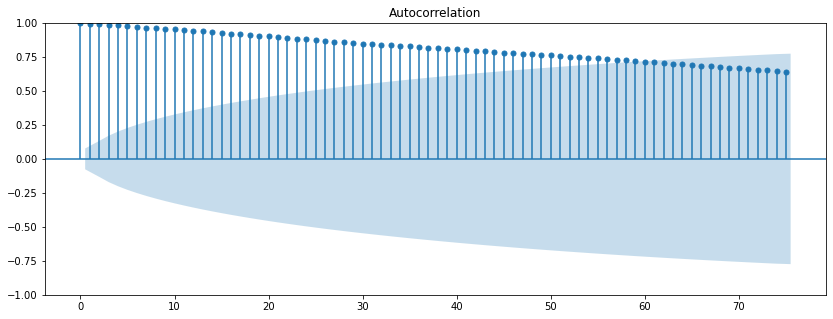

In [103]:
plot_pacf(dowjones['daily_price']);
plot_acf(dowjones['daily_price'], lags = 75);

In [104]:
plot_pacf(sp500['daily_price']);
plot_acf(sp500['daily_price'], lags = 75);

In [105]:
plot_pacf(nasdaq['daily_price']);
plot_acf(nasdaq['daily_price'], lags = 75);

In [106]:
plot_pacf(bitwise['daily_price']);
plot_acf(bitwise['daily_price'], lags = 75);

In [107]:
plot_pacf(blok['daily_price']);
plot_acf(blok['daily_price'], lags = 75);

In [108]:
def seasonal(df):
    """Takes a pandas DataFrame and plots the trend, seasonality, and residuals of time series
    
    Parameter:
    df: pandas DataFrame"""
    
    decomposition = seasonal_decompose(df['daily_price'][1:], period=5)
    seasonal = decomposition.seasonal
    
    
    plt.figure(figsize=(16,4))
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.title('Seasonality')
    plt.tight_layout();

    
    return None

In [109]:
seasonal(dowjones[1:])

The trough of the data occurs roughly 18 times per 3 month cycle. This means that about every 3 and a half trading days, Dowjones ETF completes one cycle.

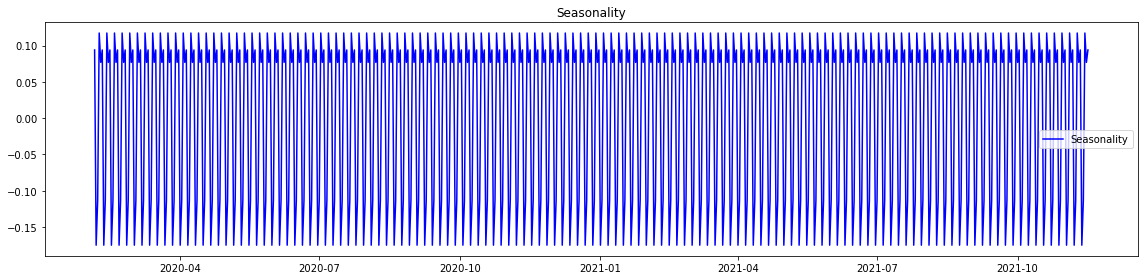

In [110]:
seasonal(sp500[1:])

SP500 sees similar seasonality to Dowjones, possessing near identical cycles seen within a three month period. 

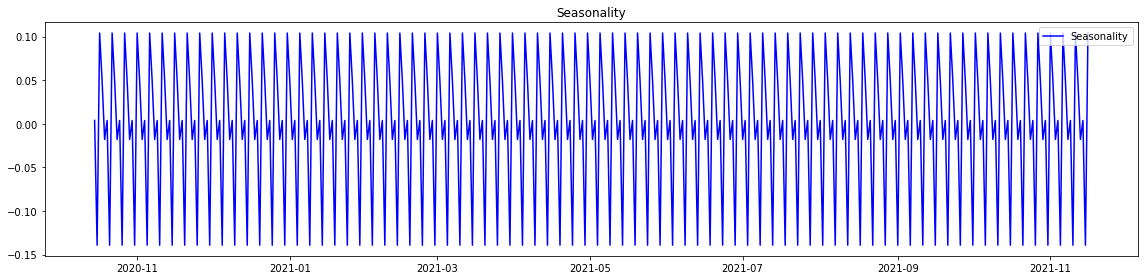

In [111]:
seasonal(nasdaq[1:])

Unsurprisingly, Nasdaq ETF also has near identical cycles. Although the raph for Nasdaq appears to be dissimilar, the x-axis is ticked every two months, as opposed to every three months for Dowjones and SP500. 8 troughs for every two moonth period.

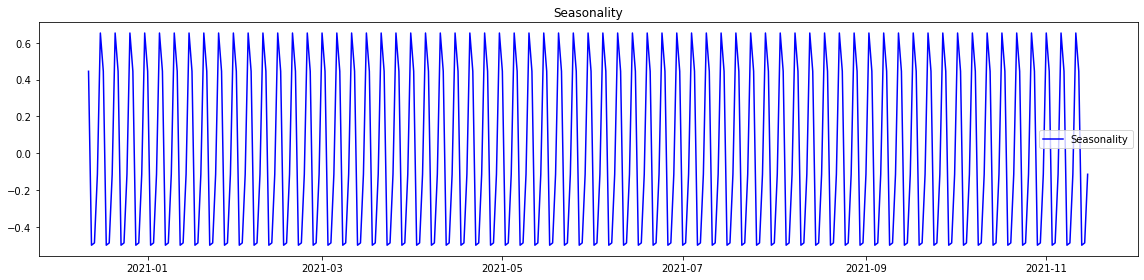

In [112]:
seasonal(bitwise[1:])

The troughs happen 11-12 times within a given two month period. 

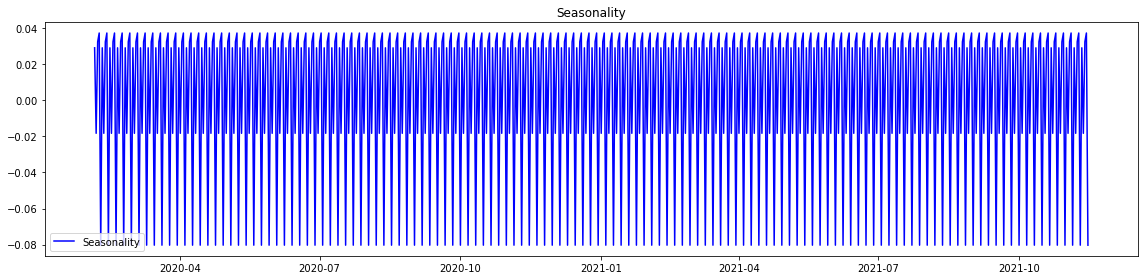

In [113]:
seasonal(blok[1:])

All five ETFs/Index Fund follow roughly the same seasonality. This happens to be every five days. Because the datasets do not inclue weekends, this seasonal period is a weekly one. In our grid search below, we will use this number as the base value for the seasonal parameter. 

### Auto-ARIMA

Auto-ARIMA grid searches the optimal values for the parameters p,d, and q instead of manually and visually observing the values through autocorrelation and partial autocorrelation graphs.

In [114]:
from pmdarima import auto_arima
auto_arima(train_dowjones[1:], start_p= 0, start_q= 0, max_p = 8, max_q = 3, seasonal = False, Trace = True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [115]:
y_hat_test1 = rw1.predict(start = test_dowjones.index[0], end = test_dowjones.index[-1], typ = 'levels')

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [117]:
import itertools
p = q = d =  range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p, d, q))]


In [118]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_dowjones[1:],order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:7392.087817787744
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:6692.663835286971
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:3304.287457022337
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:3294.7243337103273
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:3349.3287056182653
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:3339.7452151282105
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:3296.5013932766396
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:3295.93542378271
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:6680.203066196071
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:6059.234471073495
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:3082.7611407927243
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:3080.076274815258
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:3359.190435509867
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:3125.8523861668536
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:3080.9136533535034
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:3081.537479000963
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:2684.708569200628
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:2685.4835247802757
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:3005.0716649876695
ARIM

The values (1,1,1) x (0,0,0,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around 2684. We will be using these values for our final model for the Dow Jones Industrial Average exchange traded fund.

In [119]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_sp500[1:],order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:7592.419838293533
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:6892.96374714738
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:3391.0944625987836
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:3381.83275978935
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:3437.274457684539
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:3427.9977918499276
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:3383.8944558542016
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:3382.1979002081894
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:6880.285119371145
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:6250.897029403327
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:3171.9165956781862
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:3169.1896920793884
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:3453.4613020864103
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:3213.0596273180336
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:3170.106693011505
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:3170.723395620638
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:2786.5008422540204
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:2786.196023716557
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:3097.611431255278
ARIMA

The values (1,0,0) x (1,0,1,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around -3133. We will be using these values for our final model for the Standard and Poor's 500 exchange traded fund.

In [120]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_nasdaq[1:],order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:4034.5713367017543
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:3613.556450083395
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:1349.2805518709588
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:1350.9092316113415
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:1389.3233633557068
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:1390.952466666814
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:1350.9695499599497
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:1352.4900691628259
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:3601.3923808044765
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:3215.6936082163365
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:1184.5993003333765
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:1167.939846895907
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:1222.2520903517238
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:1205.4798430688538
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:1168.3318377951578
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:1169.5797966191765
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:934.7399968460975
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:934.5432044063452
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:1169.603116681081

The values (1,0,0) x (0,0,1,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around -2174. We will be using these values for our final model for the Nasdaq exchange traded fund.

In [121]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_bitwise[1:],order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:3079.366274493512
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:2768.883282254456
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:2085.9034793147944
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:2072.987264531721
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:2118.414660220286
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:2106.806897170674
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:2073.1045065623684
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:2073.910460112273
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:2722.3875868392843
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:2485.1254074793874
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:1891.9933983105223
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:1855.0458594740746
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:1920.9200143893008
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:1886.4228141057908
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:1857.4169084032828
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:1856.9649625473585
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:1753.1876746400983
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:1753.4294296363928
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:1943.0364534882085

The values (0,0,1) x (0,0,0,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around -663. We will be using these values for our final model for the Bitwise exchange traded fund.

In [122]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_blok,order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:5184.428057060541
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:4501.548445444745
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:2051.0152322690283
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:2051.4559228714406
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:2082.618940767632
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:2083.0130125042215
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:2051.692926638016
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:2049.088925332302
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:4483.231013422341
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:3932.137651468938
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:1783.3848313804406
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:1770.8919633507107
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:1812.3865839431387
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:1799.9876415503977
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:1771.8454465001032
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:1772.8918832394008
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:1402.1848024474202
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:1404.0655961326438
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:1761.1715239793994


The values (1,0,0) x (0,0,0,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around -2483. We will be using these values for our final model for the Dow Jones Industrial Average exchange traded fund.

### Modeling and Forecasting

#### SPDR Dow Jones Industrial Average ETF Trust (DIA)

In [123]:
sari_mod1 =SARIMAX(train_dowjones,order=(1,0,4),
                  seasonal_order=(0,0,0,3),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

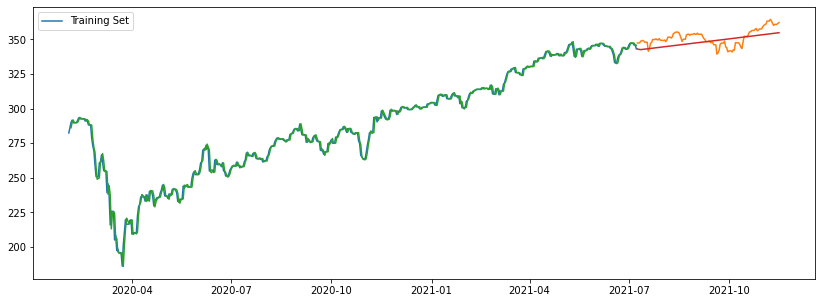

In [124]:
y_hat_train1 = sari_mod1.predict(typ='levels')
y_hat_test_sar1 = sari_mod1.predict(start=test_dowjones.index[0], end=test_dowjones.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_dowjones)
ax.legend(['Training Set'])
ax.plot(test_dowjones)
ax.plot(y_hat_train1[2:])
ax.plot(y_hat_test_sar1)

In [125]:
np.sqrt(mean_squared_error(test_dowjones, y_hat_test_sar1))

5.850400600379567

In [126]:
sari_mod =SARIMAX(dowjones['daily_price'],order=(1,0,1),seasonal_order=(0,0,0,3), enforce_stationarity=
                  False ,enforce_invertibility=False).fit()

In [127]:
forecast1 = sari_mod.forecast(steps = 100)

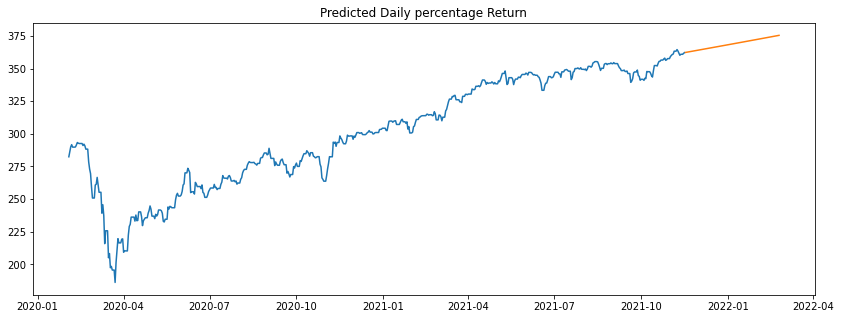

In [128]:
fig, ax = plt.subplots()

ax.plot(dowjones['daily_price'])
ax.plot(forecast1)
ax.set_title('Predicted Daily percentage Return');

In [129]:
forecast1

2021-11-17    362.324816
2021-11-18    362.454675
2021-11-19    362.584581
2021-11-20    362.714534
2021-11-21    362.844533
                 ...    
2022-02-20    374.871617
2022-02-21    375.005973
2022-02-22    375.140378
2022-02-23    375.274831
2022-02-24    375.409332
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

In [130]:
forecast1df = pd.DataFrame(forecast1)

In [131]:
forecast1df.head()

predicted_mean
2021-11-17      362.324816
2021-11-18      362.454675
2021-11-19      362.584581
2021-11-20      362.714534
2021-11-21      362.844533

#### SPDR Standard & Poor's 500 ETF Trust (SPY)

#### Invesco NASDAQ 100 ETF (QQQM)

#### Bitwise (BITW)

#### Amplify Transformational Data Sharing Index Fund (BLOK)

In [132]:
end_dow = round(dowjones.loc[dowjones.index >= '2020-04-01']['daily_price'].shape[0] * .8)
train_dowjones = dowjones.loc[dowjones.index >= '2020-04-01']['daily_price'][:end_dow]
test_dowjones = dowjones.loc[dowjones.index >= '2020-04-01']['daily_price'][end_dow:]
train_dow_prophet = train_dowjones.reset_index()
test_dow_prophet = test_dowjones.reset_index()
train_dow_prophet.columns = ['ds', 'y']
test_dow_prophet.columns = ['ds', 'y']

In [133]:
prophet = Prophet(weekly_seasonality= True, yearly_seasonality= True, daily_seasonality= True)
prophet.add_country_holidays(country_name= 'US')
prophet.fit(train_dow_prophet)

In [134]:
future= prophet.make_future_dataframe(periods=119)

In [135]:
forecast=prophet.predict(future)

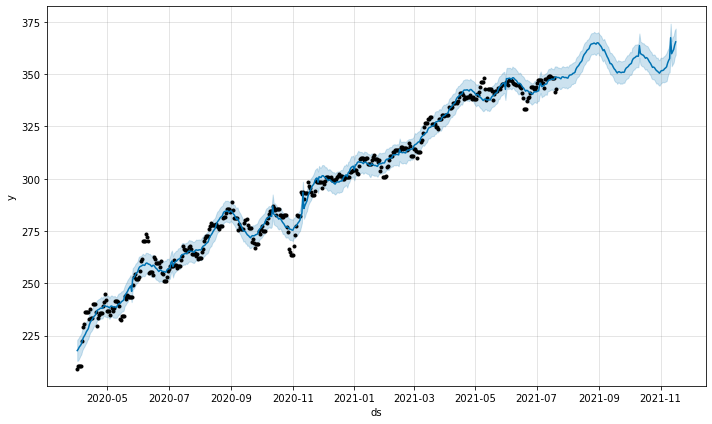

In [136]:
fig1 =prophet.plot(forecast)

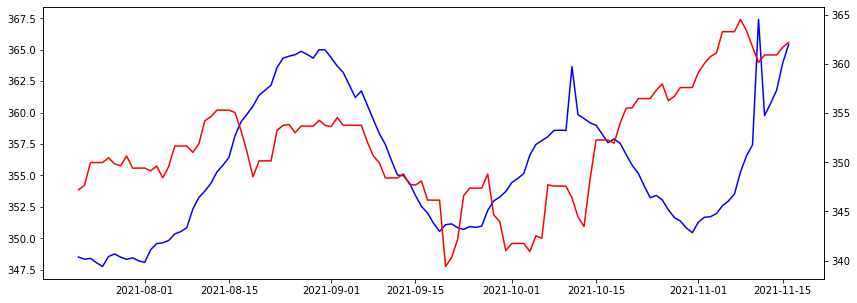

In [137]:
fig, ax = plt.subplots()
ax.plot(forecast['ds'][end_dow:], forecast['yhat'][end_dow:], color='blue')

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(test_dow_prophet['ds'], test_dow_prophet['y'], color='red')


In [138]:
mae = mean_absolute_error(forecast['yhat'][end_dow:], test_dow_prophet['y'])
print('MAE: %.3f' % mae)

MAE: 6.498


In [139]:
rmse = mean_squared_error(forecast['yhat'][end_dow:], test_dow_prophet['y'], squared = False)
print('RMSE: %.3f' % rmse)

RMSE: 7.898


In [140]:
for i in range(50,60):
    print(dowjones['return_daily_perc'][i-1] * dowjones['return_daily_perc'][i])

-0.004006196051648359
0.003851656727902325
0.0019458419987080913
-0.0006093119555152294
-0.0
0.0
0.0
1.5731518888443608e-05
-5.669999160402338e-05
-0.0002734562400660608


In [141]:
for i in range(50,60):
    print(dowjones['return_daily_perc'][i])

0.08243736488879794
0.046722220355999156
0.04164703611861298
-0.014630379789329462
0.0
0.0
0.012985490662347887
0.0012114689615894125
-0.04680267790735193
0.0058427477292513075


In [ ]:
unemployment = pd.read_csv('Unemployment.csv')

In [ ]:
unemployment = unemployment.loc[unemployment['LOCATION'] == 'USA']

In [ ]:
unemployment.head()

In [ ]:
dowjones = dowjones.loc[dowjones.index >= '2020-12-10']
sp500 = sp500.loc[sp500.index >= '2020-12-10']
nasdaq = nasdaq.loc[nasdaq.index >= '2020-12-10']
bitwise = bitwise.loc[bitwise.index >= '2020-12-10']
blok = blok.loc[blok.index >= '2020-12-10']